In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import RandomizedSearchCV

# 1. Load train/test data from GitHub

In [2]:
X_test = pd.read_csv('https://github.com/savigaur2/CS-4372/blob/main/X_test.csv?raw=true')
X_train = pd.read_csv('https://github.com/savigaur2/CS-4372/blob/main/X_train.csv?raw=true')

y_test = pd.read_csv('https://github.com/savigaur2/CS-4372/blob/main/y_test.csv?raw=true')
y_train = pd.read_csv('https://github.com/savigaur2/CS-4372/blob/main/y_train.csv?raw=true')

In [3]:
X_test.shape

(182, 3)

In [4]:
y_test.shape

(182, 1)

# 2. Base SGD Regression Model

In [5]:
def evaluate_model (model, X_train = X_train, X_test = X_test, y_train = y_train, y_test = y_test):
    print('Intercept: ', model.intercept_)
    print('Coefficient: ', model.coef_)

    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    df_metrics = pd.DataFrame({
        'Metric': ['MSE', 'RMSE', 'MAE', 'R^2', 'MSE', 'RMSE', 'MAE', 'R^2'],
        'Train/Test': ['Train', 'Train', 'Train', 'Train', 'Test', 'Test', 'Test', 'Test'],
        'Value': [mean_squared_error(y_train, y_pred_train),
                  (np.sqrt(mean_squared_error(y_train, y_pred_train))),
                  mean_absolute_error(y_train, y_pred_train),
                  r2_score(y_train, y_pred_train),
                  mean_squared_error(y_test, y_pred_test),
                  (np.sqrt(mean_squared_error(y_test, y_pred_test))),
                  mean_absolute_error(y_test, y_pred_test),
                  r2_score(y_test, y_pred_test)]
    })

    plt.figure(figsize = (15, 10))

    ax = sns.factorplot(data = df_metrics, x = 'Metric', y = 'Value', 
                   hue = 'Train/Test', kind = 'bar',).set(title = 'Performance of SDG Model on Train/Test Set')
    plt.show()

    print('Test Set Metrics')
    print('MSE Test: ', mean_squared_error(y_test, y_pred_test))
    print('RMSE Test: ', (np.sqrt(mean_squared_error(y_test, y_pred_test))))
    print('MAE Test: ', mean_absolute_error(y_test, y_pred_test))
    print('R^2 Test: ', r2_score(y_test, y_pred_test))    

    print('-----------------------------------------------------')

    print('Training Set Metrics')
    print('MSE Train: ', mean_squared_error(y_train, y_pred_train))
    print('RMSE Train: ', (np.sqrt(mean_squared_error(y_train, y_pred_train))))
    print('MAE Train: ', mean_absolute_error(y_train, y_pred_train))
    print('R^2 Train: ', r2_score(y_train, y_pred_train))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Intercept:  [-0.00242245]
Coefficient:  [ 0.2852941  -0.10983036  0.5324016 ]


<Figure size 1080x720 with 0 Axes>

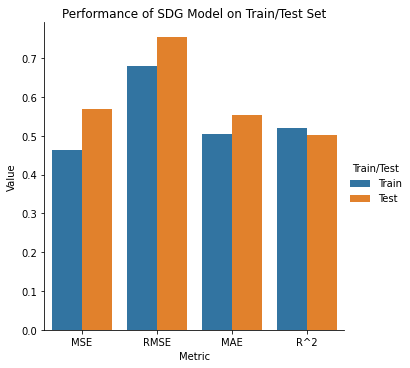

Test Set Metrics
MSE Test:  0.5696354580778993
RMSE Test:  0.7547419811285836
MAE Test:  0.5533684100039337
R^2 Test:  0.5016436729707855
-----------------------------------------------------
Training Set Metrics
MSE Train:  0.46249329024248764
RMSE Train:  0.6800685923070464
MAE Train:  0.505379145752092
R^2 Train:  0.5203053011180654


In [6]:
sgd = SGDRegressor()
sgd.fit(X_train, y_train)

evaluate_model(sgd)

# 3. Model Tuning

## 3.1 Loss function
- Change loss function to ```huber``` because it focuses less on outliers which is good for our dataset which has many outliers in the target variable
- Try out ```squared_epsilon_insensitive``` and ```squared_error```

### Huber

Intercept:  [-0.04385765]
Coefficient:  [ 0.26438997 -0.13172486  0.39492625]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 1080x720 with 0 Axes>

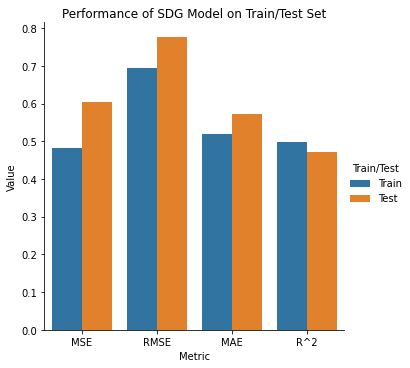

Test Set Metrics
MSE Test:  0.6029127535676596
RMSE Test:  0.7764745672381418
MAE Test:  0.5736396469808047
R^2 Test:  0.47253040321454276
-----------------------------------------------------
Training Set Metrics
MSE Train:  0.4833024281327412
RMSE Train:  0.6951995599342258
MAE Train:  0.5183439966597357
R^2 Train:  0.4987222136552739


In [7]:
sgd = SGDRegressor(loss = 'huber', random_state = 42)
sgd.fit(X_train, y_train)

evaluate_model(sgd)

Intercept:  [-0.05249994]
Coefficient:  [ 0.28112639 -0.08837003  0.5632821 ]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 1080x720 with 0 Axes>

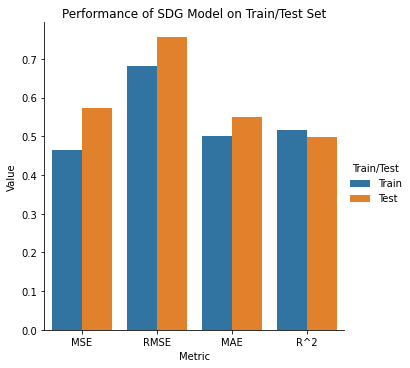

Test Set Metrics
MSE Test:  0.5726153173298255
RMSE Test:  0.7567134975205778
MAE Test:  0.5492173060043545
R^2 Test:  0.4990366868873264
-----------------------------------------------------
Training Set Metrics
MSE Train:  0.465609421132058
RMSE Train:  0.6823557877911332
MAE Train:  0.501591439507281
R^2 Train:  0.5170732726750897


In [8]:
sgd = SGDRegressor(loss = 'huber', epsilon = 0.5, random_state = 42)
sgd.fit(X_train, y_train)

evaluate_model(sgd)

Intercept:  [-0.0211059]
Coefficient:  [ 0.28875514 -0.08444483  0.56638328]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 1080x720 with 0 Axes>

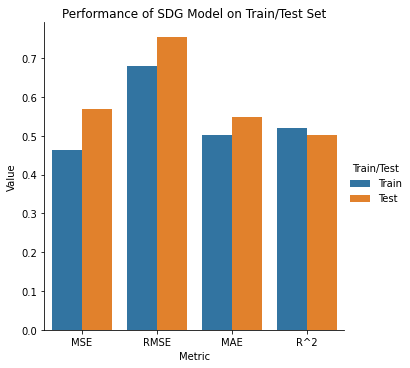

Test Set Metrics
MSE Test:  0.5700076860497182
RMSE Test:  0.7549885337206905
MAE Test:  0.5497189610740988
R^2 Test:  0.5013180223073259
-----------------------------------------------------
Training Set Metrics
MSE Train:  0.46359609863086404
RMSE Train:  0.6808789162772365
MAE Train:  0.5024424893473124
R^2 Train:  0.5191614762260128


In [9]:
sgd = SGDRegressor(loss = 'huber', epsilon = 1, random_state = 42)
sgd.fit(X_train, y_train)

evaluate_model(sgd)

Intercept:  [-0.00372978]
Coefficient:  [ 0.29223866 -0.09797452  0.55130864]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 1080x720 with 0 Axes>

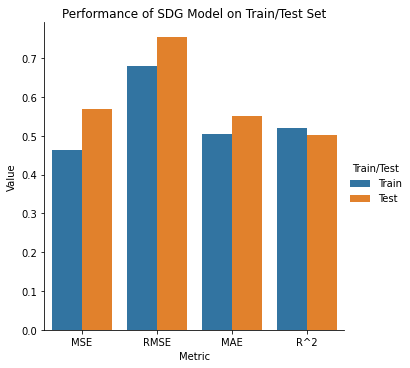

Test Set Metrics
MSE Test:  0.5691100199483579
RMSE Test:  0.7543938095904272
MAE Test:  0.5514732642861679
R^2 Test:  0.5021033624311343
-----------------------------------------------------
Training Set Metrics
MSE Train:  0.4626555160984128
RMSE Train:  0.6801878535363689
MAE Train:  0.5043386759635298
R^2 Train:  0.5201370416324671


In [10]:
sgd = SGDRegressor(loss = 'huber', epsilon = 2, random_state = 42)
sgd.fit(X_train, y_train)

evaluate_model(sgd)

Intercept:  [0.00012969]
Coefficient:  [ 0.28876454 -0.10626294  0.53622529]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 1080x720 with 0 Axes>

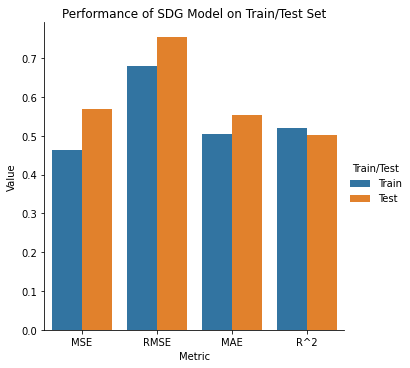

Test Set Metrics
MSE Test:  0.5695106651543215
RMSE Test:  0.7546593040268711
MAE Test:  0.5532720152753288
R^2 Test:  0.5017528504142743
-----------------------------------------------------
Training Set Metrics
MSE Train:  0.4624680480343348
RMSE Train:  0.680050033478666
MAE Train:  0.5052842002127919
R^2 Train:  0.5203314821539733


In [11]:
sgd = SGDRegressor(loss = 'huber', epsilon = 5, random_state = 42)
sgd.fit(X_train, y_train)

evaluate_model(sgd)



---



---



### Sqaured Error

Intercept:  [0.00012969]
Coefficient:  [ 0.28876454 -0.10626294  0.53622529]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 1080x720 with 0 Axes>

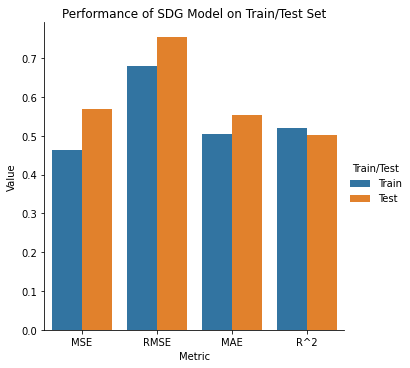

Test Set Metrics
MSE Test:  0.5695106651543215
RMSE Test:  0.7546593040268711
MAE Test:  0.5532720152753288
R^2 Test:  0.5017528504142743
-----------------------------------------------------
Training Set Metrics
MSE Train:  0.4624680480343348
RMSE Train:  0.680050033478666
MAE Train:  0.5052842002127919
R^2 Train:  0.5203314821539733


In [12]:
sgd = SGDRegressor(loss = 'squared_error', random_state = 42)
sgd.fit(X_train, y_train)

evaluate_model(sgd)



---



---







## Sqaured Epsilon Intensive

Intercept:  [0.0077533]
Coefficient:  [ 0.28287029 -0.1036312   0.52458282]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 1080x720 with 0 Axes>

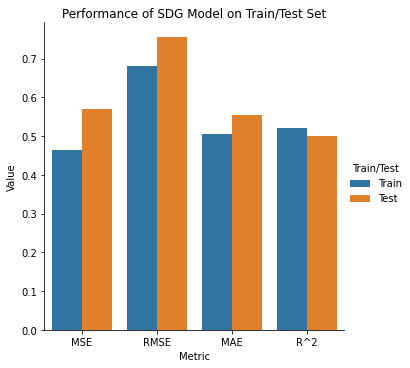

Test Set Metrics
MSE Test:  0.5707293711058955
RMSE Test:  0.7554663269172859
MAE Test:  0.5549950802046558
R^2 Test:  0.5006866425208885
-----------------------------------------------------
Training Set Metrics
MSE Train:  0.4628507053179432
RMSE Train:  0.6803313202535535
MAE Train:  0.5063715230789556
R^2 Train:  0.5199345927843151


In [13]:
sgd = SGDRegressor(loss = 'squared_epsilon_insensitive', random_state = 42)
sgd.fit(X_train, y_train)

evaluate_model(sgd)

Intercept:  [0.07810748]
Coefficient:  [ 0.28126729 -0.16507336  0.49574502]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 1080x720 with 0 Axes>

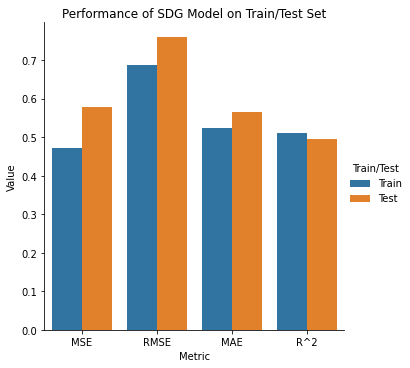

Test Set Metrics
MSE Test:  0.5775878052127947
RMSE Test:  0.7599919770713338
MAE Test:  0.5661784546327536
R^2 Test:  0.4946864120538118
-----------------------------------------------------
Training Set Metrics
MSE Train:  0.4716240607295404
RMSE Train:  0.6867489066096432
MAE Train:  0.5225672966502783
R^2 Train:  0.5108349319435194


In [14]:
sgd = SGDRegressor(loss = 'squared_epsilon_insensitive', epsilon = 0.5, random_state = 42)
sgd.fit(X_train, y_train)

evaluate_model(sgd)

Intercept:  [0.15229442]
Coefficient:  [ 0.25526257 -0.27914993  0.39972191]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 1080x720 with 0 Axes>

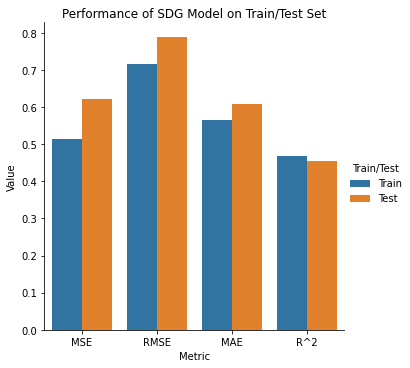

Test Set Metrics
MSE Test:  0.6218515985325727
RMSE Test:  0.7885756771119514
MAE Test:  0.6075090758869081
R^2 Test:  0.45596139740381414
-----------------------------------------------------
Training Set Metrics
MSE Train:  0.5138167235983702
RMSE Train:  0.7168101028852553
MAE Train:  0.5643943944361047
R^2 Train:  0.46707300688017717


In [15]:
sgd = SGDRegressor(loss = 'squared_epsilon_insensitive', epsilon = 1, random_state = 42)
sgd.fit(X_train, y_train)

evaluate_model(sgd)

Intercept:  [0.18970141]
Coefficient:  [ 0.21019891 -0.2773164   0.31769917]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 1080x720 with 0 Axes>

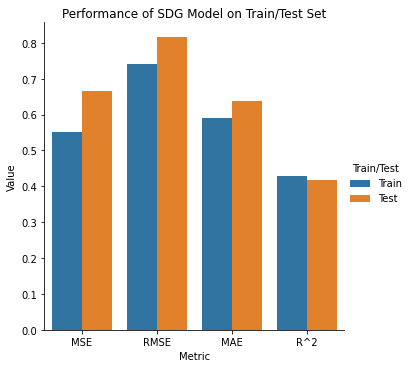

Test Set Metrics
MSE Test:  0.6663964885057444
RMSE Test:  0.816331114503021
MAE Test:  0.6392205364250476
R^2 Test:  0.41699046004353035
-----------------------------------------------------
Training Set Metrics
MSE Train:  0.5504860462780929
RMSE Train:  0.7419474686782703
MAE Train:  0.5897119231045233
R^2 Train:  0.4290398503519355


In [16]:
sgd = SGDRegressor(loss = 'squared_epsilon_insensitive', epsilon = 1.5, random_state = 42)
sgd.fit(X_train, y_train)

evaluate_model(sgd)

Intercept:  [0.16129896]
Coefficient:  [ 0.16732601 -0.16163291  0.2231287 ]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 1080x720 with 0 Axes>

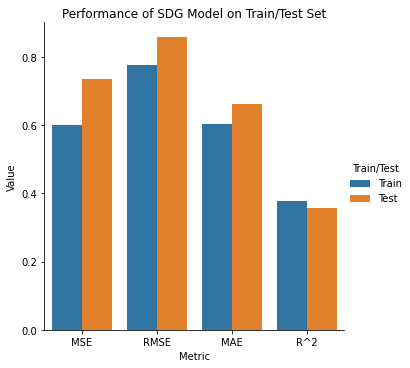

Test Set Metrics
MSE Test:  0.7365085075439994
RMSE Test:  0.8582007384895445
MAE Test:  0.661270609988506
R^2 Test:  0.3556516374807521
-----------------------------------------------------
Training Set Metrics
MSE Train:  0.6012399706616838
RMSE Train:  0.7753966537596637
MAE Train:  0.6033678694610228
R^2 Train:  0.376398246705106


In [17]:
sgd = SGDRegressor(loss = 'squared_epsilon_insensitive', epsilon = 2, random_state = 42)
sgd.fit(X_train, y_train)

evaluate_model(sgd)

Intercept:  [0.]
Coefficient:  [0. 0. 0.]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 1080x720 with 0 Axes>

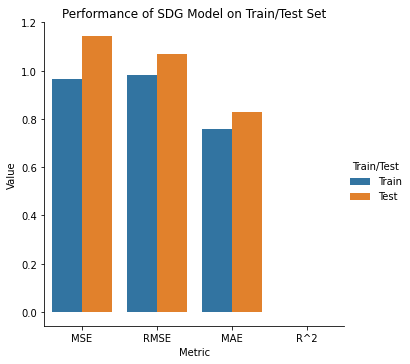

Test Set Metrics
MSE Test:  1.1430394815481297
RMSE Test:  1.0691302453621494
MAE Test:  0.8283561821450667
R^2 Test:  -9.654588256857721e-06
-----------------------------------------------------
Training Set Metrics
MSE Train:  0.964141617573334
RMSE Train:  0.9819071328661046
MAE Train:  0.756989246724237
R^2 Train:  -7.1931615264198e-07


In [18]:
sgd = SGDRegressor(loss = 'squared_epsilon_insensitive', epsilon = 5, random_state = 42)
sgd.fit(X_train, y_train)

evaluate_model(sgd)



---



---



## Epsilon Intensive

Intercept:  [-0.0599024]
Coefficient:  [ 0.28394949 -0.07198268  0.5829361 ]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 1080x720 with 0 Axes>

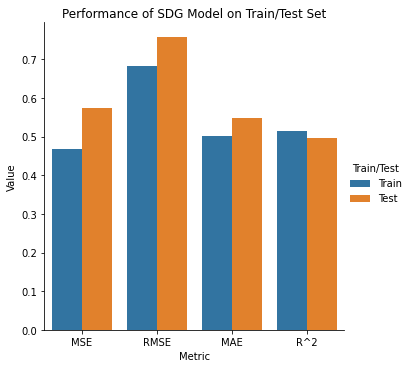

Test Set Metrics
MSE Test:  0.5744573190391956
RMSE Test:  0.7579296267063292
MAE Test:  0.548870181342088
R^2 Test:  0.4974251769413678
-----------------------------------------------------
Training Set Metrics
MSE Train:  0.4676256339477784
RMSE Train:  0.6838315830288759
MAE Train:  0.5009277020833003
R^2 Train:  0.5149820713108239


In [19]:
sgd = SGDRegressor(loss = 'epsilon_insensitive', random_state = 42)
sgd.fit(X_train, y_train)

evaluate_model(sgd)

Intercept:  [0.07810748]
Coefficient:  [ 0.28126729 -0.16507336  0.49574502]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 1080x720 with 0 Axes>

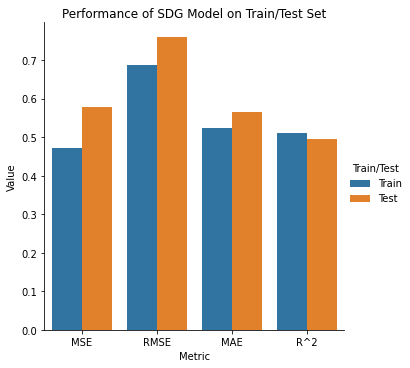

Test Set Metrics
MSE Test:  0.5775878052127947
RMSE Test:  0.7599919770713338
MAE Test:  0.5661784546327536
R^2 Test:  0.4946864120538118
-----------------------------------------------------
Training Set Metrics
MSE Train:  0.4716240607295404
RMSE Train:  0.6867489066096432
MAE Train:  0.5225672966502783
R^2 Train:  0.5108349319435194


In [20]:
sgd = SGDRegressor(loss = 'squared_epsilon_insensitive', epsilon = 0.5, random_state = 42)
sgd.fit(X_train, y_train)

evaluate_model(sgd)

Intercept:  [0.15229442]
Coefficient:  [ 0.25526257 -0.27914993  0.39972191]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 1080x720 with 0 Axes>

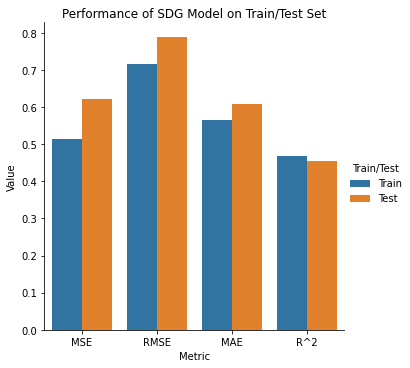

Test Set Metrics
MSE Test:  0.6218515985325727
RMSE Test:  0.7885756771119514
MAE Test:  0.6075090758869081
R^2 Test:  0.45596139740381414
-----------------------------------------------------
Training Set Metrics
MSE Train:  0.5138167235983702
RMSE Train:  0.7168101028852553
MAE Train:  0.5643943944361047
R^2 Train:  0.46707300688017717


In [21]:
sgd = SGDRegressor(loss = 'squared_epsilon_insensitive', epsilon = 1, random_state = 42)
sgd.fit(X_train, y_train)

evaluate_model(sgd)

Intercept:  [0.02196605]
Coefficient:  [ 0.28073811 -0.11450982  0.51603695]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 1080x720 with 0 Axes>

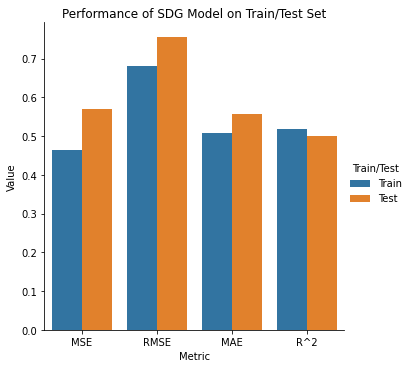

Test Set Metrics
MSE Test:  0.5711998331334515
RMSE Test:  0.755777634713711
MAE Test:  0.5564589981386093
R^2 Test:  0.5002750499405203
-----------------------------------------------------
Training Set Metrics
MSE Train:  0.46349578650066964
RMSE Train:  0.6808052485848428
MAE Train:  0.5090039346501648
R^2 Train:  0.5192655192426424


In [22]:
sgd = SGDRegressor(loss = 'squared_epsilon_insensitive', epsilon = 0.2, random_state = 42)
sgd.fit(X_train, y_train)

evaluate_model(sgd)

Intercept:  [0.0020832]
Coefficient:  [ 0.28358483 -0.09877708  0.52858822]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 1080x720 with 0 Axes>

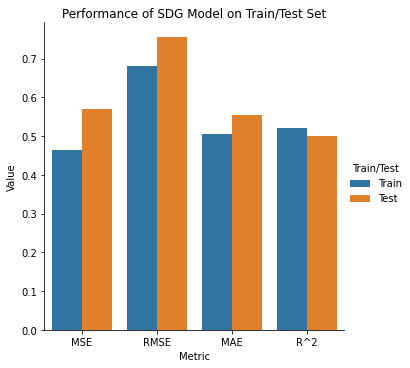

Test Set Metrics
MSE Test:  0.5707026940395763
RMSE Test:  0.7554486706848959
MAE Test:  0.5543949142515018
R^2 Test:  0.5007099814556375
-----------------------------------------------------
Training Set Metrics
MSE Train:  0.46276735896114496
RMSE Train:  0.6802700632551347
MAE Train:  0.5054530216144095
R^2 Train:  0.5200210390233648


In [23]:
sgd = SGDRegressor(loss = 'squared_epsilon_insensitive', epsilon = 0.05, random_state = 42)
sgd.fit(X_train, y_train)

evaluate_model(sgd)

Intercept:  [-0.0004067]
Coefficient:  [ 0.28348818 -0.09609803  0.53057825]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 1080x720 with 0 Axes>

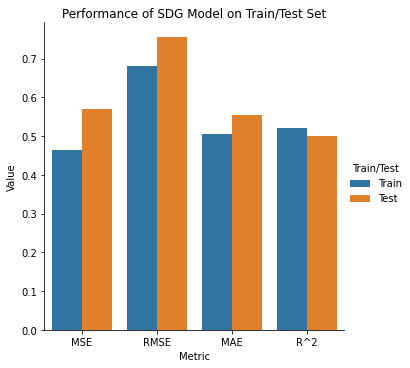

Test Set Metrics
MSE Test:  0.5707497271956078
RMSE Test:  0.7554797993299409
MAE Test:  0.5541097929771259
R^2 Test:  0.5006688336117733
-----------------------------------------------------
Training Set Metrics
MSE Train:  0.46278309643047155
RMSE Train:  0.6802816302315325
MAE Train:  0.5050766685912843
R^2 Train:  0.5200047162338908


In [24]:
sgd = SGDRegressor(loss = 'squared_epsilon_insensitive', epsilon = 0.025, random_state = 42)
sgd.fit(X_train, y_train)

evaluate_model(sgd)

Intercept:  [7.03740908e-05]
Coefficient:  [ 0.28352989 -0.09665803  0.53017249]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 1080x720 with 0 Axes>

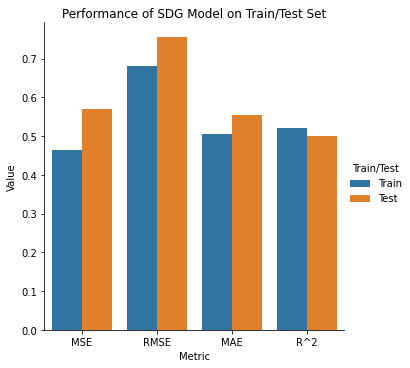

Test Set Metrics
MSE Test:  0.5707372733120017
RMSE Test:  0.7554715569179304
MAE Test:  0.5541623897313832
R^2 Test:  0.5006797291267964
-----------------------------------------------------
Training Set Metrics
MSE Train:  0.46277695356780996
RMSE Train:  0.6802771152756867
MAE Train:  0.5051494308607551
R^2 Train:  0.5200110875666579


In [25]:
sgd = SGDRegressor(loss = 'squared_epsilon_insensitive', epsilon = 0.03, random_state = 42)
sgd.fit(X_train, y_train)

evaluate_model(sgd)

***Huber function with eplsion = 2 had the best testing R^2 so we will proceeed with those two parameters and add on***

## 3.2 Penalty
- l1
- l2 (default)
- elasticnet

Intercept:  [-0.00373167]
Coefficient:  [ 0.29217755 -0.0978916   0.55130859]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 1080x720 with 0 Axes>

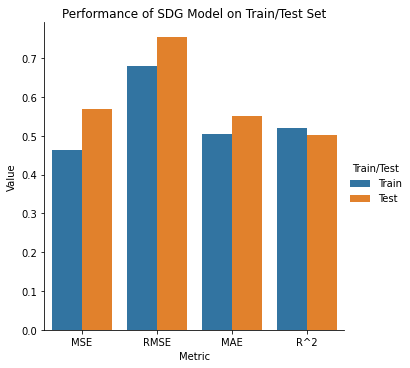

Test Set Metrics
MSE Test:  0.5691136449543286
RMSE Test:  0.7543962121818538
MAE Test:  0.5514725264404172
R^2 Test:  0.5021001910262728
-----------------------------------------------------
Training Set Metrics
MSE Train:  0.4626555136060252
RMSE Train:  0.680187851704237
MAE Train:  0.5043343125005791
R^2 Train:  0.5201370442175535


In [26]:
sgd = SGDRegressor(loss = 'huber', epsilon = 2, penalty = 'l1', random_state = 42)
sgd.fit(X_train, y_train)

evaluate_model(sgd)

Intercept:  [-0.00372978]
Coefficient:  [ 0.29223866 -0.09797452  0.55130864]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 1080x720 with 0 Axes>

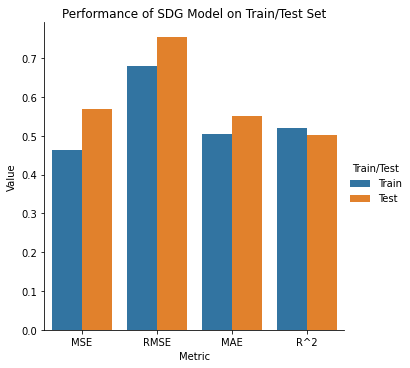

Test Set Metrics
MSE Test:  0.5691100199483579
RMSE Test:  0.7543938095904272
MAE Test:  0.5514732642861679
R^2 Test:  0.5021033624311343
-----------------------------------------------------
Training Set Metrics
MSE Train:  0.4626555160984128
RMSE Train:  0.6801878535363689
MAE Train:  0.5043386759635298
R^2 Train:  0.5201370416324671


In [27]:
sgd = SGDRegressor(loss = 'huber', epsilon = 2, penalty = 'l2', random_state = 42)
sgd.fit(X_train, y_train)

evaluate_model(sgd)

Intercept:  [-0.00373007]
Coefficient:  [ 0.2922295  -0.09796208  0.55130863]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 1080x720 with 0 Axes>

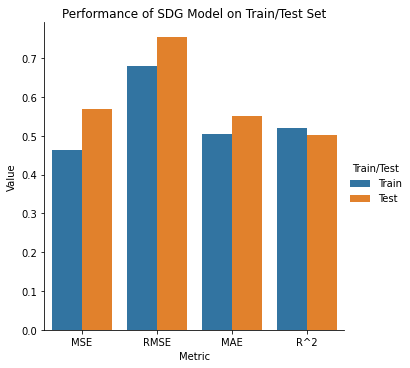

Test Set Metrics
MSE Test:  0.5691105621487209
RMSE Test:  0.7543941689519617
MAE Test:  0.5514731537043757
R^2 Test:  0.5021028880769178
-----------------------------------------------------
Training Set Metrics
MSE Train:  0.46265551416535144
RMSE Train:  0.6801878521153928
MAE Train:  0.5043380215146462
R^2 Train:  0.5201370436374244


In [28]:
sgd = SGDRegressor(loss = 'huber', epsilon = 2, penalty = 'elasticnet', random_state = 42)
sgd.fit(X_train, y_train)

evaluate_model(sgd)

Intercept:  [-0.00372988]
Coefficient:  [ 0.29223561 -0.09797038  0.55130864]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 1080x720 with 0 Axes>

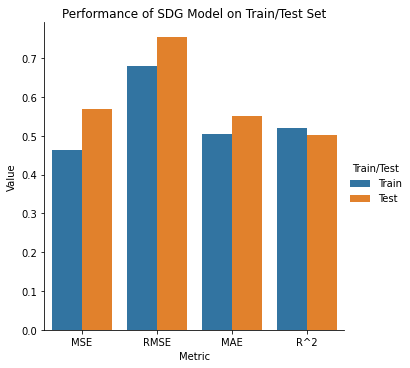

Test Set Metrics
MSE Test:  0.5691102006210166
RMSE Test:  0.7543939293373301
MAE Test:  0.5514732274292978
R^2 Test:  0.5021032043662503
-----------------------------------------------------
Training Set Metrics
MSE Train:  0.4626555153929236
RMSE Train:  0.6801878530177701
MAE Train:  0.5043384578166686
R^2 Train:  0.5201370423641953


In [29]:
sgd = SGDRegressor(loss = 'huber', epsilon = 2, penalty = 'elasticnet',
                   random_state = 42, l1_ratio = 0.05)
sgd.fit(X_train, y_train)

evaluate_model(sgd)

Intercept:  [-0.00373044]
Coefficient:  [ 0.29221727 -0.0979455   0.55130862]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 1080x720 with 0 Axes>

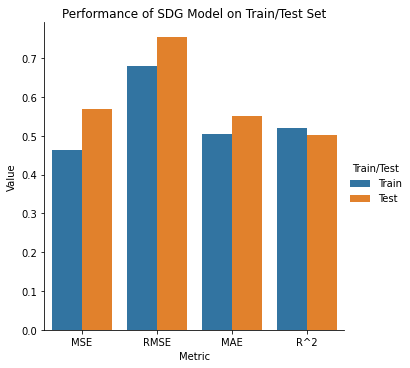

Test Set Metrics
MSE Test:  0.5691112859337186
RMSE Test:  0.7543946486645559
MAE Test:  0.5514730062097973
R^2 Test:  0.5021022548599579
-----------------------------------------------------
Training Set Metrics
MSE Train:  0.4626555124438758
RMSE Train:  0.6801878508499515
MAE Train:  0.5043371488774
R^2 Train:  0.5201370454229264


In [30]:
sgd = SGDRegressor(loss = 'huber', epsilon = 2, penalty = 'elasticnet',
                   random_state = 42, l1_ratio = 0.35)
sgd.fit(X_train, y_train)

evaluate_model(sgd)

Intercept:  [-0.00373073]
Coefficient:  [ 0.29220811 -0.09793306  0.55130861]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 1080x720 with 0 Axes>

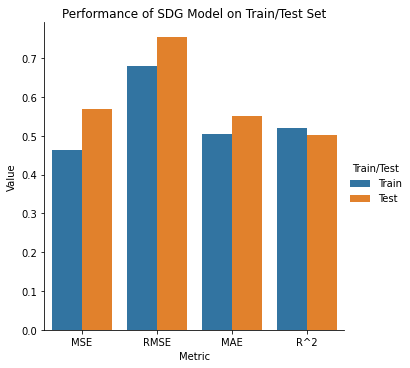

Test Set Metrics
MSE Test:  0.5691118294109057
RMSE Test:  0.7543950088719474
MAE Test:  0.551472895549718
R^2 Test:  0.5021017793886877
-----------------------------------------------------
Training Set Metrics
MSE Train:  0.46265551179477776
RMSE Train:  0.6801878503728053
MAE Train:  0.5043364943704122
R^2 Train:  0.5201370460961663


In [31]:
sgd = SGDRegressor(loss = 'huber', epsilon = 2, penalty = 'elasticnet',
                   random_state = 42, l1_ratio = 0.5)
sgd.fit(X_train, y_train)

evaluate_model(sgd)

Intercept:  [-0.0037312]
Coefficient:  [ 0.29219283 -0.09791233  0.5513086 ]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 1080x720 with 0 Axes>

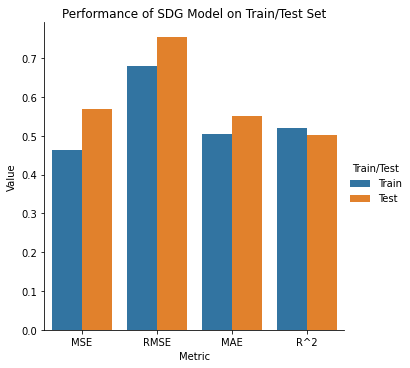

Test Set Metrics
MSE Test:  0.5691127364224128
RMSE Test:  0.7543956100232906
MAE Test:  0.5514727110416808
R^2 Test:  0.5021009858725594
-----------------------------------------------------
Training Set Metrics
MSE Train:  0.4626555119359446
RMSE Train:  0.6801878504765758
MAE Train:  0.5043354034700887
R^2 Train:  0.520137045949749


In [32]:
sgd = SGDRegressor(loss = 'huber', epsilon = 2, penalty = 'elasticnet',
                   random_state = 42, l1_ratio = 0.75)
sgd.fit(X_train, y_train)

evaluate_model(sgd)

***Penalty of l2 (default) had the best test R^2 score wo we will move forward with that***

## 3.3 Alpha
- current R^2 to beat: ```0.5021033624311343```

Intercept:  [-0.00256495]
Coefficient:  [ 0.27391015 -0.11402418  0.49357689]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 1080x720 with 0 Axes>

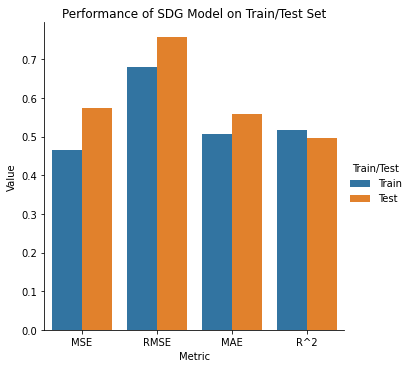

Test Set Metrics
MSE Test:  0.5745460232315563
RMSE Test:  0.7579881418805682
MAE Test:  0.5580217888722625
R^2 Test:  0.4973475724052209
-----------------------------------------------------
Training Set Metrics
MSE Train:  0.4645776834551367
RMSE Train:  0.6815993569943686
MAE Train:  0.5082288624375757
R^2 Train:  0.5181433835387443


In [33]:
sgd = SGDRegressor(loss = 'huber',
                   epsilon = 2,
                   penalty = 'l2',
                   alpha = 0.1,
                   random_state = 42)
sgd.fit(X_train, y_train)

evaluate_model(sgd)

Intercept:  [-0.00286304]
Coefficient:  [ 0.25732983 -0.12269637  0.44895872]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 1080x720 with 0 Axes>

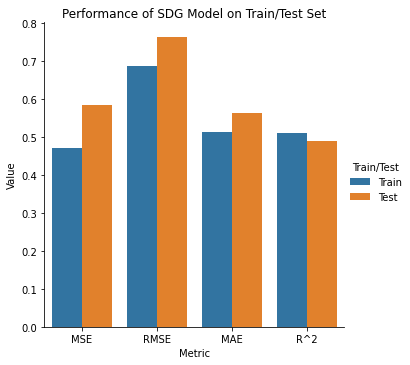

Test Set Metrics
MSE Test:  0.5844027958961071
RMSE Test:  0.7644624228149525
MAE Test:  0.564074857057481
R^2 Test:  0.48872418888544755
-----------------------------------------------------
Training Set Metrics
MSE Train:  0.4711094742130246
RMSE Train:  0.6863741503094538
MAE Train:  0.5137201527412939
R^2 Train:  0.5113686573602909


In [34]:
sgd = SGDRegressor(loss = 'huber',
                   epsilon = 2,
                   penalty = 'l2',
                   alpha = 0.2,
                   random_state = 42)
sgd.fit(X_train, y_train)

evaluate_model(sgd)

Intercept:  [-0.00372976]
Coefficient:  [ 0.2922183  -0.09799332  0.55124472]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 1080x720 with 0 Axes>

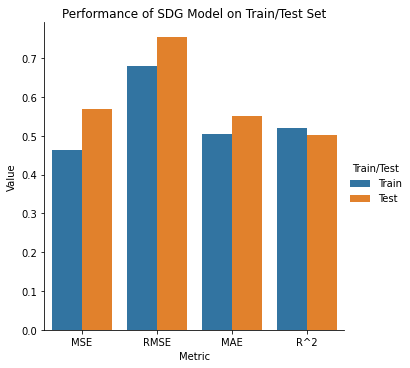

Test Set Metrics
MSE Test:  0.5691119286299208
RMSE Test:  0.7543950746325965
MAE Test:  0.5514804147825987
R^2 Test:  0.5021016925850605
-----------------------------------------------------
Training Set Metrics
MSE Train:  0.4626539163904812
RMSE Train:  0.6801866776043773
MAE Train:  0.5043401910909909
R^2 Train:  0.520138700837975


In [35]:
sgd = SGDRegressor(loss = 'huber',
                   epsilon = 2,
                   penalty = 'l2',
                   alpha = 0.0002,
                   random_state = 42)
sgd.fit(X_train, y_train)

evaluate_model(sgd)

Intercept:  [-0.0037298]
Coefficient:  [ 0.29224884 -0.09796512  0.55134061]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 1080x720 with 0 Axes>

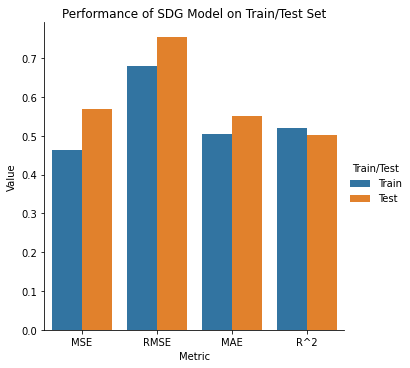

Test Set Metrics
MSE Test:  0.5691090688769387
RMSE Test:  0.7543931792354294
MAE Test:  0.5514696883097683
R^2 Test:  0.502104194493908
-----------------------------------------------------
Training Set Metrics
MSE Train:  0.4626563191978663
RMSE Train:  0.6801884438873291
MAE Train:  0.5043379181371354
R^2 Train:  0.5201362086635166


In [36]:
sgd = SGDRegressor(loss = 'huber',
                   epsilon = 2,
                   penalty = 'l2',
                   alpha = 0.00005,
                   random_state = 42)
sgd.fit(X_train, y_train)

evaluate_model(sgd)

Intercept:  [-0.0037298]
Coefficient:  [ 0.29225698 -0.09795759  0.55136618]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 1080x720 with 0 Axes>

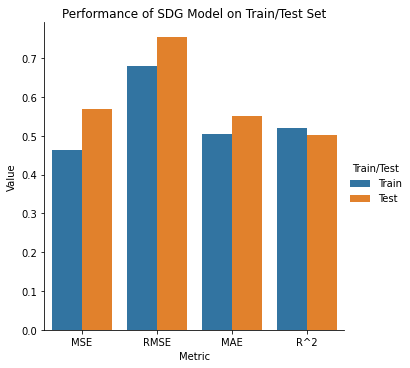

Test Set Metrics
MSE Test:  0.569108309589805
RMSE Test:  0.7543926759916251
MAE Test:  0.5514668271790248
R^2 Test:  0.5021048587705813
-----------------------------------------------------
Training Set Metrics
MSE Train:  0.4626569632359275
RMSE Train:  0.6801889173133648
MAE Train:  0.5043373117499005
R^2 Train:  0.5201355406718932


In [37]:
sgd = SGDRegressor(loss = 'huber',
                   epsilon = 2,
                   penalty = 'l2',
                   alpha = 0.00001,
                   random_state = 42)
sgd.fit(X_train, y_train)

evaluate_model(sgd)

Intercept:  [-0.00372981]
Coefficient:  [ 0.29225902 -0.09795571  0.55137258]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 1080x720 with 0 Axes>

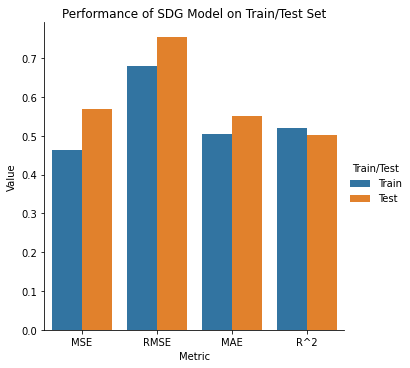

Test Set Metrics
MSE Test:  0.5691081199861292
RMSE Test:  0.7543925503251799
MAE Test:  0.551466111847773
R^2 Test:  0.502105024648934
-----------------------------------------------------
Training Set Metrics
MSE Train:  0.46265712446194945
RMSE Train:  0.6801890358289742
MAE Train:  0.5043371601355722
R^2 Train:  0.5201353734494281


In [38]:
sgd = SGDRegressor(loss = 'huber',
                   epsilon = 2,
                   penalty = 'l2',
                   alpha = 0,
                   random_state = 42)
sgd.fit(X_train, y_train)

evaluate_model(sgd)

***Alpha of 0 gives us the best test R^2 so we will move forward with that***

## 3.4 Max Iter

Intercept:  [-0.00372981]
Coefficient:  [ 0.29225902 -0.09795571  0.55137258]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 1080x720 with 0 Axes>

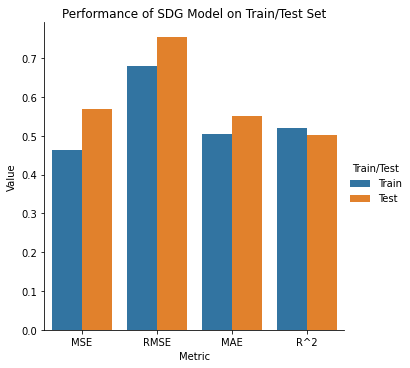

Test Set Metrics
MSE Test:  0.5691081199861292
RMSE Test:  0.7543925503251799
MAE Test:  0.551466111847773
R^2 Test:  0.502105024648934
-----------------------------------------------------
Training Set Metrics
MSE Train:  0.46265712446194945
RMSE Train:  0.6801890358289742
MAE Train:  0.5043371601355722
R^2 Train:  0.5201353734494281


In [39]:
sgd = SGDRegressor(loss = 'huber',
                   epsilon = 2,
                   penalty = 'l2',
                   alpha = 0,
                   max_iter = 1500,
                   random_state = 42)
sgd.fit(X_train, y_train)

evaluate_model(sgd)

Intercept:  [-0.00372981]
Coefficient:  [ 0.29225902 -0.09795571  0.55137258]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 1080x720 with 0 Axes>

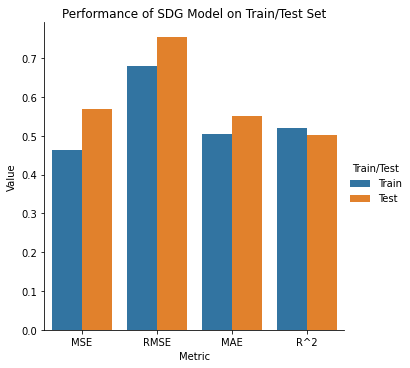

Test Set Metrics
MSE Test:  0.5691081199861292
RMSE Test:  0.7543925503251799
MAE Test:  0.551466111847773
R^2 Test:  0.502105024648934
-----------------------------------------------------
Training Set Metrics
MSE Train:  0.46265712446194945
RMSE Train:  0.6801890358289742
MAE Train:  0.5043371601355722
R^2 Train:  0.5201353734494281


In [40]:
sgd = SGDRegressor(loss = 'huber',
                   epsilon = 2,
                   penalty = 'l2',
                   alpha = 0,
                   max_iter = 2500,
                   random_state = 42)
sgd.fit(X_train, y_train)

evaluate_model(sgd)

Intercept:  [-0.00372981]
Coefficient:  [ 0.29225902 -0.09795571  0.55137258]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 1080x720 with 0 Axes>

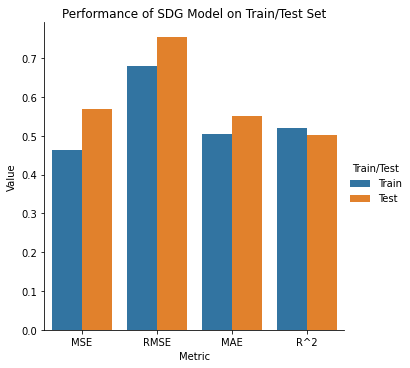

Test Set Metrics
MSE Test:  0.5691081199861292
RMSE Test:  0.7543925503251799
MAE Test:  0.551466111847773
R^2 Test:  0.502105024648934
-----------------------------------------------------
Training Set Metrics
MSE Train:  0.46265712446194945
RMSE Train:  0.6801890358289742
MAE Train:  0.5043371601355722
R^2 Train:  0.5201353734494281


In [41]:
sgd = SGDRegressor(loss = 'huber',
                   epsilon = 2,
                   penalty = 'l2',
                   alpha = 0,
                   max_iter = 3500,
                   random_state = 42)
sgd.fit(X_train, y_train)

evaluate_model(sgd)

Intercept:  [-0.00372981]
Coefficient:  [ 0.29225902 -0.09795571  0.55137258]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 1080x720 with 0 Axes>

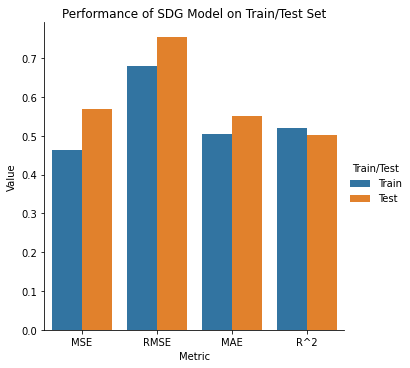

Test Set Metrics
MSE Test:  0.5691081199861292
RMSE Test:  0.7543925503251799
MAE Test:  0.551466111847773
R^2 Test:  0.502105024648934
-----------------------------------------------------
Training Set Metrics
MSE Train:  0.46265712446194945
RMSE Train:  0.6801890358289742
MAE Train:  0.5043371601355722
R^2 Train:  0.5201353734494281


In [42]:
sgd = SGDRegressor(loss = 'huber',
                   epsilon = 2,
                   penalty = 'l2',
                   alpha = 0,
                   max_iter = 500,
                   random_state = 42)
sgd.fit(X_train, y_train)

evaluate_model(sgd)

***Performance not increasing as max_iter changes so leave at defualt 1000***

## 3.5 Learning Rate
- Constant
- Optimal
- Invscaling (default)
- Adaptive

Intercept:  [-0.03744368]
Coefficient:  [ 0.24568384 -0.05033171  0.56507875]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 1080x720 with 0 Axes>

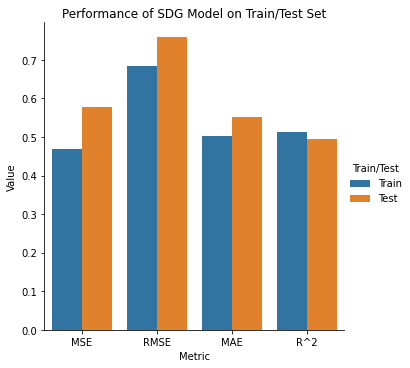

Test Set Metrics
MSE Test:  0.5766351097738258
RMSE Test:  0.7593649384675499
MAE Test:  0.5514892775449021
R^2 Test:  0.4955198956317901
-----------------------------------------------------
Training Set Metrics
MSE Train:  0.4684470310556081
RMSE Train:  0.6844319038849724
MAE Train:  0.5031413570854432
R^2 Train:  0.5141301241656095


In [43]:
sgd = SGDRegressor(loss = 'huber',
                   epsilon = 2,
                   penalty = 'l2',
                   alpha = 0,
                   max_iter = 1000,
                   learning_rate = 'constant',
                   random_state = 42)
sgd.fit(X_train, y_train)

evaluate_model(sgd)

Intercept:  [0.25931784]
Coefficient:  [ 0.10862453 -0.25280916  0.67935229]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 1080x720 with 0 Axes>

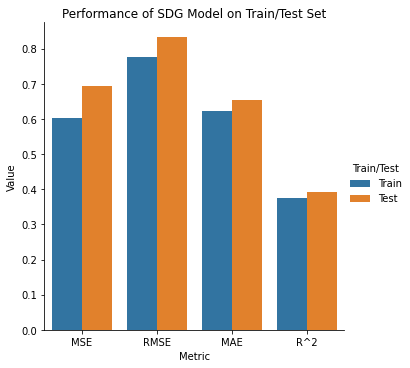

Test Set Metrics
MSE Test:  0.6939379569169165
RMSE Test:  0.8330293853862039
MAE Test:  0.653897038579674
R^2 Test:  0.3928952868169615
-----------------------------------------------------
Training Set Metrics
MSE Train:  0.6027551779500868
RMSE Train:  0.7763730919796789
MAE Train:  0.6218997274293528
R^2 Train:  0.3748266846537449


In [44]:
sgd = SGDRegressor(loss = 'huber',
                   epsilon = 2,
                   penalty = 'l2',
                   alpha = 0.0001,
                   max_iter = 1000,
                   learning_rate = 'optimal',
                   random_state = 42)
sgd.fit(X_train, y_train)

evaluate_model(sgd)

Intercept:  [-0.00752008]
Coefficient:  [ 0.29226783 -0.09954365  0.55008305]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 1080x720 with 0 Axes>

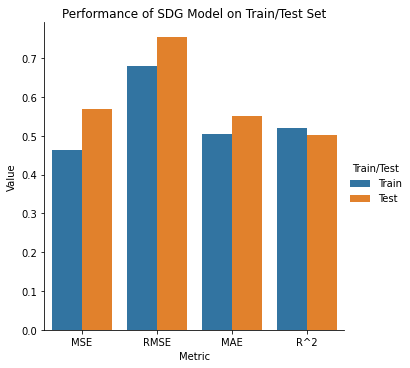

Test Set Metrics
MSE Test:  0.5691897022950331
RMSE Test:  0.7544466199109339
MAE Test:  0.5514271416331
R^2 Test:  0.5020336508268881
-----------------------------------------------------
Training Set Metrics
MSE Train:  0.46264993287550704
RMSE Train:  0.6801837493468269
MAE Train:  0.5041408246357425
R^2 Train:  0.5201428325109232


In [45]:
sgd = SGDRegressor(loss = 'huber',
                   epsilon = 2,
                   penalty = 'l2',
                   alpha = 0,
                   max_iter = 1000,
                   learning_rate = 'adaptive',
                   random_state = 42)
sgd.fit(X_train, y_train)

evaluate_model(sgd)

***Chaning leanring rate does not increase performance, so keeping default invscaling learning rate***

## 3.6 Warm Start

Intercept:  [-0.00372981]
Coefficient:  [ 0.29225902 -0.09795571  0.55137258]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 1080x720 with 0 Axes>

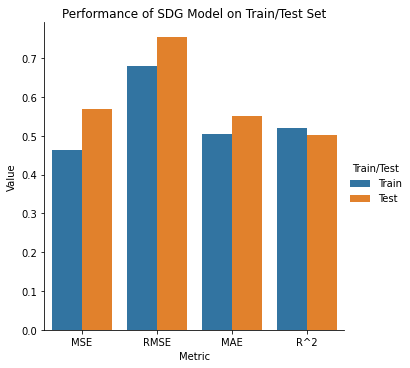

Test Set Metrics
MSE Test:  0.5691081199861292
RMSE Test:  0.7543925503251799
MAE Test:  0.551466111847773
R^2 Test:  0.502105024648934
-----------------------------------------------------
Training Set Metrics
MSE Train:  0.46265712446194945
RMSE Train:  0.6801890358289742
MAE Train:  0.5043371601355722
R^2 Train:  0.5201353734494281


In [46]:
sgd = SGDRegressor(loss = 'huber',
                   epsilon = 2,
                   penalty = 'l2',
                   alpha = 0,
                   max_iter = 1000,
                   learning_rate = 'invscaling',
                   warm_start = True,
                   random_state = 42)
sgd.fit(X_train, y_train)

evaluate_model(sgd)

***Changing warm start does not change performance so keep default of false***

## 3.7 Average

Intercept:  [-0.00497269]
Coefficient:  [ 0.28294509 -0.1229599   0.5026559 ]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 1080x720 with 0 Axes>

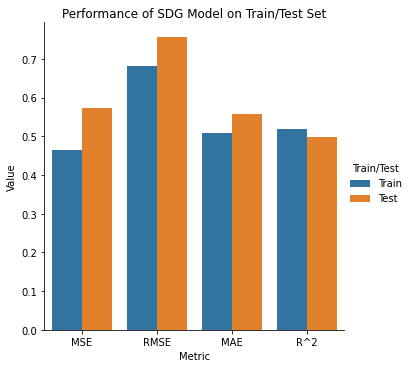

Test Set Metrics
MSE Test:  0.5723644431560768
RMSE Test:  0.7565477137339567
MAE Test:  0.556898680104603
R^2 Test:  0.4992561688911289
-----------------------------------------------------
Training Set Metrics
MSE Train:  0.4634781864646645
RMSE Train:  0.6807923225658942
MAE Train:  0.5074660379331906
R^2 Train:  0.5192837738728174


In [47]:
sgd = SGDRegressor(loss = 'huber',
                   epsilon = 2,
                   penalty = 'l2',
                   alpha = 0,
                   max_iter = 1000,
                   learning_rate = 'invscaling',
                   warm_start = False,
                   average = True,
                   random_state = 42)
sgd.fit(X_train, y_train)

evaluate_model(sgd)

Intercept:  [-0.00499868]
Coefficient:  [ 0.28339536 -0.12313894  0.5034051 ]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 1080x720 with 0 Axes>

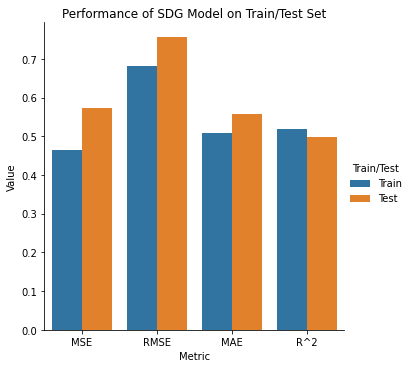

Test Set Metrics
MSE Test:  0.5722471942167301
RMSE Test:  0.7564702203105751
MAE Test:  0.5568184195592163
R^2 Test:  0.49935874633769095
-----------------------------------------------------
Training Set Metrics
MSE Train:  0.4634267830304297
RMSE Train:  0.6807545688648955
MAE Train:  0.5074141483040033
R^2 Train:  0.5193370891433888


In [48]:
sgd = SGDRegressor(loss = 'huber',
                   epsilon = 2,
                   penalty = 'l2',
                   alpha = 0,
                   max_iter = 1000,
                   learning_rate = 'invscaling',
                   warm_start = False,
                   average = 10,
                   random_state = 42)
sgd.fit(X_train, y_train)

evaluate_model(sgd)

Intercept:  [-0.00497929]
Coefficient:  [ 0.28314288 -0.12304257  0.50299579]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 1080x720 with 0 Axes>

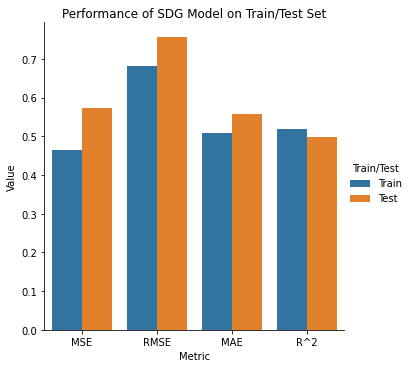

Test Set Metrics
MSE Test:  0.5723107656106043
RMSE Test:  0.7565122375815241
MAE Test:  0.5568619326348175
R^2 Test:  0.499303129704446
-----------------------------------------------------
Training Set Metrics
MSE Train:  0.46345470807840733
RMSE Train:  0.6807750789199083
MAE Train:  0.5074430809142989
R^2 Train:  0.5193081254853997


In [49]:
sgd = SGDRegressor(loss = 'huber',
                   epsilon = 2,
                   penalty = 'l2',
                   alpha = 0,
                   max_iter = 1000,
                   learning_rate = 'invscaling',
                   warm_start = False,
                   average = 5,
                   random_state = 42)
sgd.fit(X_train, y_train)

evaluate_model(sgd)

Intercept:  [-0.00497269]
Coefficient:  [ 0.28294509 -0.1229599   0.5026559 ]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 1080x720 with 0 Axes>

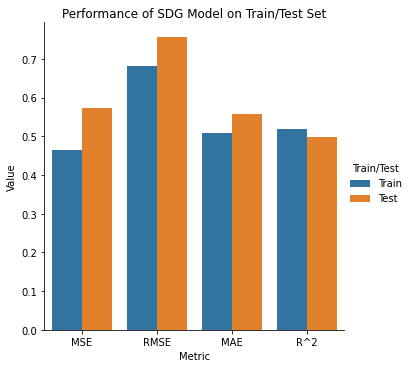

Test Set Metrics
MSE Test:  0.5723644431560768
RMSE Test:  0.7565477137339567
MAE Test:  0.556898680104603
R^2 Test:  0.4992561688911289
-----------------------------------------------------
Training Set Metrics
MSE Train:  0.4634781864646645
RMSE Train:  0.6807923225658942
MAE Train:  0.5074660379331906
R^2 Train:  0.5192837738728174


In [50]:
sgd = SGDRegressor(loss = 'huber',
                   epsilon = 2,
                   penalty = 'l2',
                   alpha = 0,
                   max_iter = 1000,
                   learning_rate = 'invscaling',
                   warm_start = False,
                   average = 1,
                   random_state = 42)
sgd.fit(X_train, y_train)

evaluate_model(sgd)

Intercept:  [-0.00372981]
Coefficient:  [ 0.29225902 -0.09795571  0.55137258]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 1080x720 with 0 Axes>

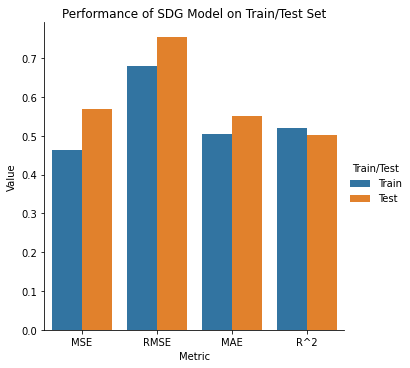

Test Set Metrics
MSE Test:  0.5691081199861292
RMSE Test:  0.7543925503251799
MAE Test:  0.551466111847773
R^2 Test:  0.502105024648934
-----------------------------------------------------
Training Set Metrics
MSE Train:  0.46265712446194945
RMSE Train:  0.6801890358289742
MAE Train:  0.5043371601355722
R^2 Train:  0.5201353734494281


In [51]:
sgd = SGDRegressor(loss = 'huber',
                   epsilon = 2,
                   penalty = 'l2',
                   alpha = 0,
                   max_iter = 1000,
                   learning_rate = 'invscaling',
                   warm_start = False,
                   average = 0,
                   random_state = 42)
sgd.fit(X_train, y_train)

evaluate_model(sgd)

***Changing average does not increase performance so keep deafult of False***

## 3.8 Fit Intercept

Intercept:  [0.]
Coefficient:  [ 0.29231838 -0.09789264  0.55157208]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 1080x720 with 0 Axes>

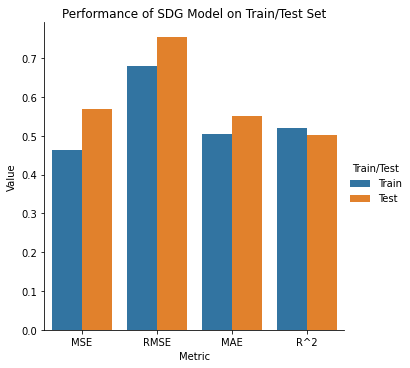

Test Set Metrics
MSE Test:  0.5690280796802941
RMSE Test:  0.7543394989527554
MAE Test:  0.5516076525643188
R^2 Test:  0.5021750494205044
-----------------------------------------------------
Training Set Metrics
MSE Train:  0.46266341906406644
RMSE Train:  0.6801936629108407
MAE Train:  0.5046096230155906
R^2 Train:  0.5201288447335942


In [52]:
sgd = SGDRegressor(loss = 'huber',
                   epsilon = 2,
                   penalty = 'l2',
                   alpha = 0,
                   max_iter = 1000,
                   learning_rate = 'invscaling',
                   warm_start = False,
                   average = False,
                   fit_intercept = False,
                   random_state = 42)
sgd.fit(X_train, y_train)

evaluate_model(sgd)

***A value of False for ```fit_intercept``` increased the test R^2, so we will use this going forward***

## Final Parameters:
- ```loss``` = 'huber'
- ```epsilon``` = 2
- ```penalty``` = '12'
- ```alpha``` = 0
- ```max_iter``` = 1000
- ```learning_rate``` = 'invscaling'
- ```warm_start``` = False
- ```average``` = False
- ```fit_intercept``` = False
- ```random_state``` = 42

# 4. Variable Selection/Removal

SGD Model with predictors:  ['SM1_Dz']
Intercept:  [0.]
Coefficient:  [0.42039272]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 1080x720 with 0 Axes>

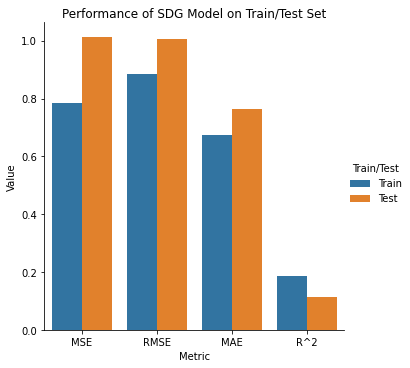

Test Set Metrics
MSE Test:  1.0126143935115013
RMSE Test:  1.0062874308623264
MAE Test:  0.762893227896783
R^2 Test:  0.1140951942315781
-----------------------------------------------------
Training Set Metrics
MSE Train:  0.7857927333864649
RMSE Train:  0.8864495097784559
MAE Train:  0.6746670844464394
R^2 Train:  0.1849814546978602


SGD Model with predictors:  ['SM1_Dz', 'GATS1i']
Intercept:  [0.]
Coefficient:  [ 0.37412102 -0.32232547]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 1080x720 with 0 Axes>

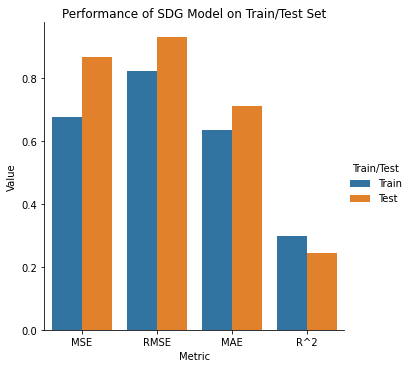

Test Set Metrics
MSE Test:  0.8657637666311045
RMSE Test:  0.9304642747742143
MAE Test:  0.7120765558263488
R^2 Test:  0.24257023558696378
-----------------------------------------------------
Training Set Metrics
MSE Train:  0.6772906933231243
RMSE Train:  0.8229767270847483
MAE Train:  0.6353467486969904
R^2 Train:  0.2975189866671798


SGD Model with predictors:  ['SM1_Dz', 'GATS1i', 'MLOGP']
Intercept:  [0.]
Coefficient:  [ 0.29231838 -0.09789264  0.55157208]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 1080x720 with 0 Axes>

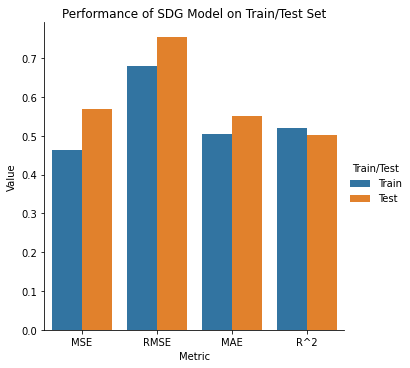

Test Set Metrics
MSE Test:  0.5690280796802941
RMSE Test:  0.7543394989527554
MAE Test:  0.5516076525643188
R^2 Test:  0.5021750494205044
-----------------------------------------------------
Training Set Metrics
MSE Train:  0.46266341906406644
RMSE Train:  0.6801936629108407
MAE Train:  0.5046096230155906
R^2 Train:  0.5201288447335942




In [53]:
columns = X_train.columns
predictors = []

for col in columns:
    predictors.append(col)
    sdg = SGDRegressor(loss = 'huber',
                   epsilon = 2,
                   penalty = 'l2',
                   alpha = 0,
                   max_iter = 1000,
                   learning_rate = 'invscaling',
                   warm_start = False,
                   average = False,
                   fit_intercept = False,
                   random_state = 42)
    X_train_trimmed = X_train[predictors]
    X_test_trimmed = X_test[predictors]

    sdg.fit(X_train_trimmed, y_train)

    print('SGD Model with predictors: ', predictors)
    evaluate_model(sdg, X_train = X_train_trimmed, X_test = X_test_trimmed)
    print()
    print()

***Using all three variables as predictors yeilds the best performance***

# Final Model

Intercept:  [0.]
Coefficient:  [ 0.29231838 -0.09789264  0.55157208]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 1080x720 with 0 Axes>

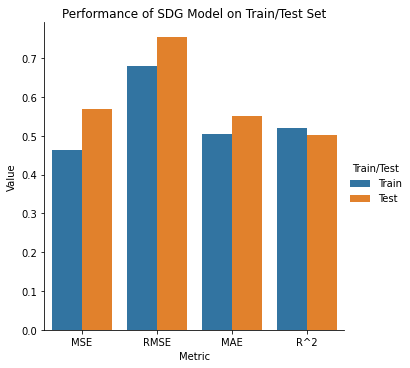

Test Set Metrics
MSE Test:  0.5690280796802941
RMSE Test:  0.7543394989527554
MAE Test:  0.5516076525643188
R^2 Test:  0.5021750494205044
-----------------------------------------------------
Training Set Metrics
MSE Train:  0.46266341906406644
RMSE Train:  0.6801936629108407
MAE Train:  0.5046096230155906
R^2 Train:  0.5201288447335942


In [54]:
sdg = SGDRegressor(loss = 'huber',
                   epsilon = 2,
                   penalty = 'l2',
                   alpha = 0,
                   max_iter = 1000,
                   learning_rate = 'invscaling',
                   warm_start = False,
                   average = False,
                   fit_intercept = False,
                   random_state = 42)
sdg.fit(X_train, y_train)
evaluate_model(sdg)